# MS4610 Introduction to Data Analytics || Course Project 
### Exploratory Data Analysis (Statistical + Graphical)
Notebook by **Group 12**

This notebook explores the dataset statistically and graphically. Distributions of features and necessary transformations, patterns in missing values and imputation strategies, encoding and typecasting as necessary for model training have been performed. The following analyses have been performed:

1. Quantity and distribution of missing values in dataset 
2. Detecting correlated variables through correlation heatmap

### Dataset Description

1. **train.csv**
    - `application_key`: primary key for dataset
    - `credit_score`: credit worthiness based on past transactions
    - `risk_score`: score based on number and riskiness of enquiries
    - `sev_def_any`: severity of default on any loan
    - `sev_def_auto`: severity of default on auto loans
    - `sev_def_edu`: severity of default on education loans
    - `min_credit_rev`: minimum credit on all revolving cards
    - `max_credit_act`: maximum credit on all active credit lines
    - `max_credit_act_rev`: maximum credit on all active revolving cards
    - `total_credit_1_miss`: sum of credit on all cards where borrower missed 1 payment
    - `total_credit`: total credit on all accepted credit lines
    - `due_collected`: amount of dues collected post default where due was more than 500
    - `total_due`: sum of amount due on all active credit cards
    - `annual_pay`: annual amount paid towards all cards last year
    - `annual_income`: annual income of individual
    - `property_value`: estimated market value of property owned by customer
    - `fc_cards_act_rev`: no. of active revolving credit cards on which full credit utilized
    - `fc_cards_act`: no. of active credit cards on which full credit utilized
    - `fc_lines_act`: no. of active credit lines on which full credit utilized
    - `pc_cards_act`: no. of active credit cards on which at least 75% credit utilized
    - `pc_lines_act`: no. of active credit lines on which at least 75% credit utilized
    - `loan_util_act_rev`: average utilization (%) on active revolving credit card loans
    - `line_util_past2`: average utilization (%) of line on all credit lines activated in past 2 years
    - `line_util_past1`: average utilization (%) of line on all credit cards activated in past 1 year
    - `line_util_1_miss`: Average utilization of line on credit cards on which the borrower has missed 1 payment during last 6 months (%)
    - `tenure_act_rev`: average tenure of active revolving credit cards
    - `tenure_oldest_act`: tenure of oldest card among all active cards
    - `tenure_oldest_act_rev`: tenure of oldest revolving card among all active revolving cards
    - `last_miss_time`: number days since last miss of payment on any credit lines
    - `tenure_oldest_line`: tenure of oldest line
    - `max_tenure_auto`: maximum tenure on all auto loans
    - `max_tenure_edu`: maximum tenure on all education loans
    - `total_tenure_act`: sum of tenures (months) on all active credit cards
    - `residence_time`: duration of stay at current residential address
    - `lines_act_1_miss`: number of active credit lines in past 6 months with 1 payment missed
    - `cards_rev_1_miss`: numer of revolving credit cards in last 2 year with 1 payment missed
    - `lines_act`: number of active credit lines
    - `cards_act_t2`: credit cards with tenure of at least 2 years
    - `lines_act_2yrs`: number of credit lines activated in last 2 years
    - `lines_deli`: number of lines on which borrower has current delinquency
    - `line_util_edu`: utilization of lines (%) on active education loans
    - `line_util_auto`: utilization of lines (%) on active auto loans
    - `stress_index`: financial stress index of borrower
    - `lines_high_risk`: Number of credit lines on which the borrower has never missed a payment in last 2 yrs, yet considered as high risk loans based on market prediction of economic scenario
    - `max_due_ratio`: ratio of maximum amount due on all credit lines to sum of amounts due on all credit lines
    - `mort_2_miss`: number of mortgage loans on which 2 payments are missed
    - `auto_2_miss`: number of auto loans on which 2 payments are missed
    - `card_type`: C = Charge card or L = Lending card, which the customer applied for
    - `location_id`: location ID
    - `default_ind`: Default indicator

In [39]:
# Data handling libraries

import numpy as np
import pandas as pd

# Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Others

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load training data

train = pd.read_csv(".././mod_data/train.csv")

## Useful Functions
In this section, we have defined some functions that are commonly used in exploratory data analysis (EDA). This makes readability of code and repeatability of operations convenient down the line. Available functions:
1. **missing_table**: Tally of missing values in the dataset by column, arranged in descending order.
2. **nunique_table**: Tally of number of unique values in every column. Helps determine whether column has continuous data or is categorical.

In [36]:
def missing_table(df, threshold=None, ascending=False):
    """
    Counts number of missing values and percentage of missing values in every column
    of input pandas DataFrame object.
    
    :params: 
        threshold: (int/float) returns only those columns with number/percentage of missing
                   values higher than this value, default is None (returns all columns)
        ascending: (boolean) sorts table in ascending order of missing values
                   if set to True, default is False
                   
    :return: pandas DataFrame object with column name, number of missing values and percentage
             of missing values
    """
    cols = df.columns
    miss_vals = np.array([df[col].isnull().sum() for col in cols])
    miss_vals_percent = (miss_vals / len(df))*100
    
    miss_table = pd.DataFrame(np.vstack((cols, miss_vals, miss_vals_percent)).T,
                              columns=['column', 'missing values', '% missing values'])
    
    if threshold is None:
        miss_table = miss_table.sort_values(by='missing values', ascending=ascending)
        return miss_table
    else:
        if threshold <= 1.0:
            ret = miss_table.loc[miss_table['% missing values'] >= threshold*100.0, :]
            return ret.sort_values(by='missing values', ascending=ascending)
        elif threshold > 1.0:
            ret = miss_table.loc[miss_table['missing values'] >= threshold, :]
            return ret.sort_values(by='missing values', ascending=ascending)
        else:
            raise ValueError('Invalid threshold type')
            

def nunique_table(df, which=None, ascending=False):
    """
    Counts number of unique values for specified/all columns of the pandas DataFrame. Columns
    with few unique values could potentially be represented as categorical variables.
    
    :params:
        which:      (list) function returns unique value counts only for columns 
                    specified in this list. Default (None) returns counts for all columns
        ascending:  (boolean) sorts table in ascending order of missing values
                    if set to True, default is False 
                    
    :return: pandas DataFrame object column name, number of unique values and percentage of 
             total values which are unique
    """
    cols = df.columns
    unique_vals = np.array([df[col].nunique() for col in cols])
    percentage = (unique_vals / len(df))*100
    
    unique_table = pd.DataFrame(np.vstack((cols, unique_vals, percentage)).T,
                                columns=['column', 'unique values', '% of total'])
    unique_table = unique_table.sort_values(by='unique values', ascending=ascending)
    
    if which is None:
        return unique_table
    else:
        part_cols = np.array(which)
        unique_vals = df[which].nunique().values
        percentage = (unique_vals/len(df))*100
        
        unique_table = pd.DataFrame(np.vstack((part_cols, unique_vals, percentage)).T,
                             columns=['column', 'unique values', '% of total'])
        unique_table['unique values'] = unique_table['unique values'].astype('int')
        unique_table['% of total'] = unique_table['% of total'].astype('float')
        unique_table = unique_table.sort_values(by='unique values', ascending=ascending)
        return unique_table

## Missing Value Analysis
In this section, we quantify the amount of missing data in **train.csv** and attempt to find any patterns in the distribution of missing data in the table, using functions from `seaborn` library.

In [11]:
# Missing values table for train.csv

missing_table(train, threshold=0.4)

,column,missing values,% missing values
40,line_util_edu,65070,78.3976
31,max_tenure_edu,58539,70.5289
41,line_util_auto,57264,68.9928
11,due_collected,46717,56.2855
45,mort_2_miss,45920,55.3253
23,line_util_past1,42311,50.9771
30,max_tenure_auto,37988,45.7687
35,cards_rev_1_miss,34868,42.0096
15,property_value,33519,40.3843


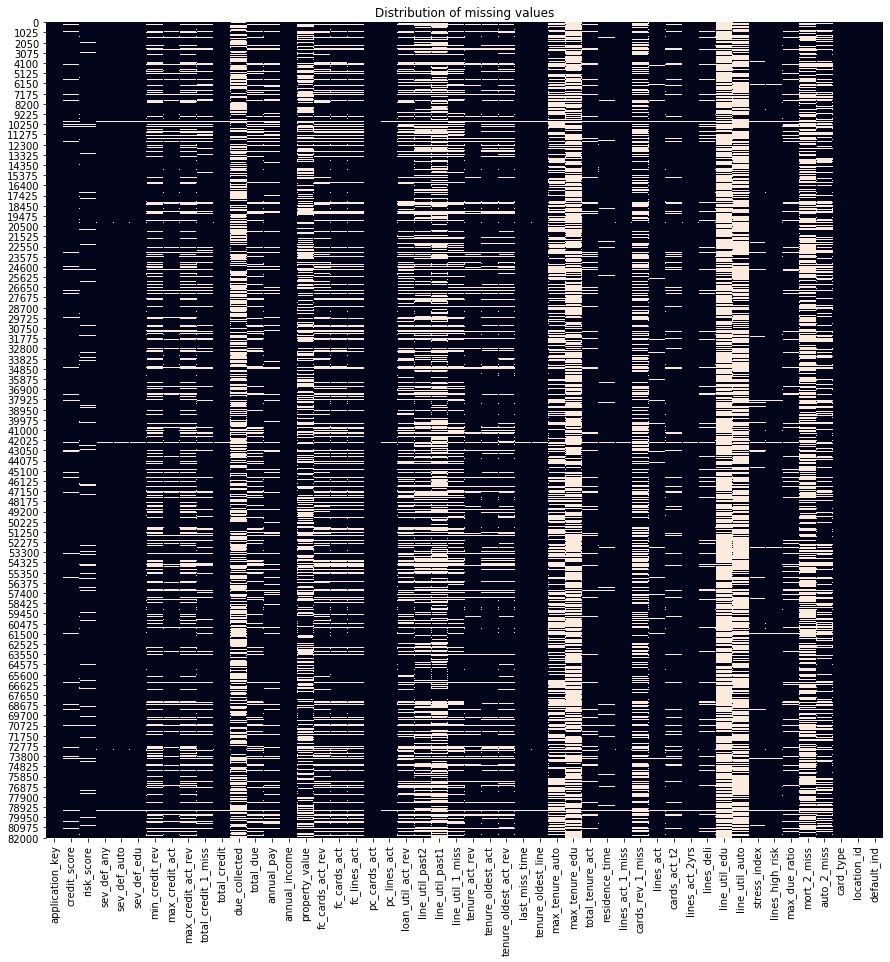

In [8]:
# Distribution of missing values in the dataset
# White lines indicate missing values

plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(), cbar=False)
plt.title('Distribution of missing values')
plt.show()

**Some observations**
1. Few rows have almost all columns with missing values; dropping these rows will make some columns free from missing values
2. Some columns seem to be taking missing values in the same records (symmetrically). Is it possible that these columns are correlated? For instance, the heatmap of these columns look almost identical:
    1. `min_credit_rev` and `max_credit_act_rev`
    2. `total_tenure_act` and `cards_act_t2`
    3. `fc_cards_act`, `fc_lines_act` and `fc_cards_act_rev`
    4. `max_due_ratio` and `lines_deli`

## Feature Distributions
In this section we observe the distributions of non-null data for each feature. To impute missing values for any relevant feature, we need to have a guess for the distribution the data belongs to. The imputed values should more or less maintain the population distribution for better performance on models.

In [37]:
# Checking number of unique values in numeric columns
# This is to check if any seemingly continuous columns are actually categorical

num_cols = train.drop(['application_key', 'card_type', 'location_id', 'default_ind'], axis=1).columns.tolist()
nunique_table(train, which=num_cols, ascending=False)

,column,unique values,% of total
43,max_due_ratio,43532,52.448193
9,total_credit,40624,48.944578
14,property_value,33893,40.834940
21,line_util_past2,32918,39.660241
8,total_credit_1_miss,30441,36.675904
6,max_credit_act,29001,34.940964
12,annual_pay,27984,33.715663
20,loan_util_act_rev,26854,32.354217
1,risk_score,24656,29.706024
22,line_util_past1,22728,27.383133


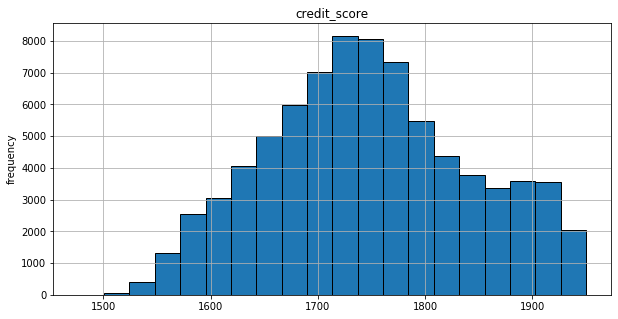

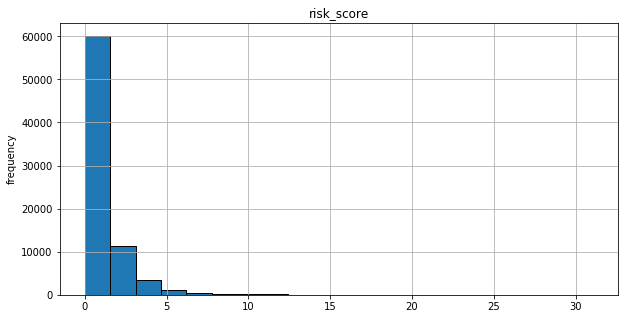

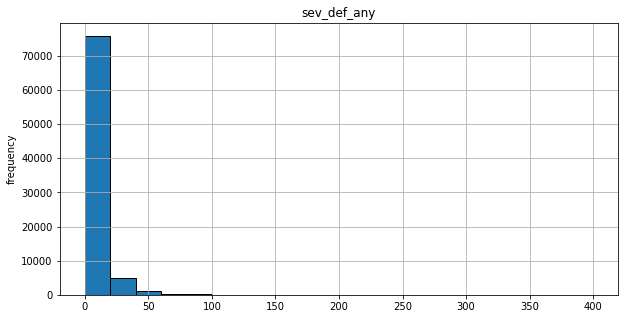

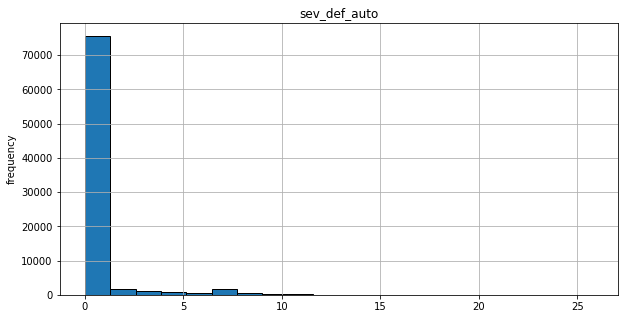

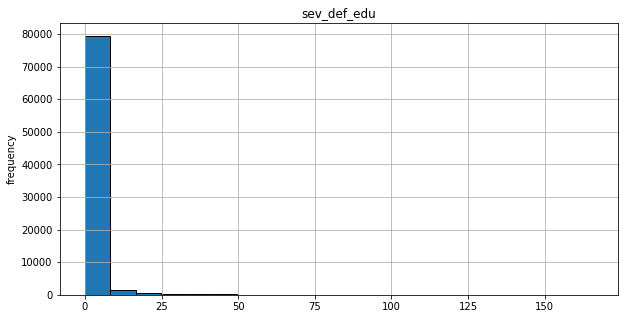

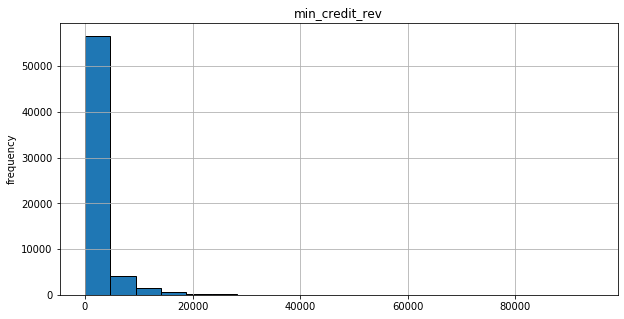

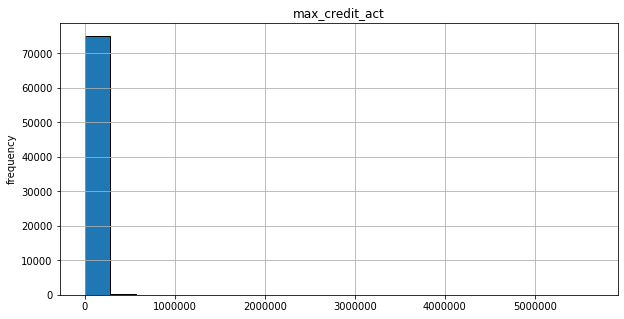

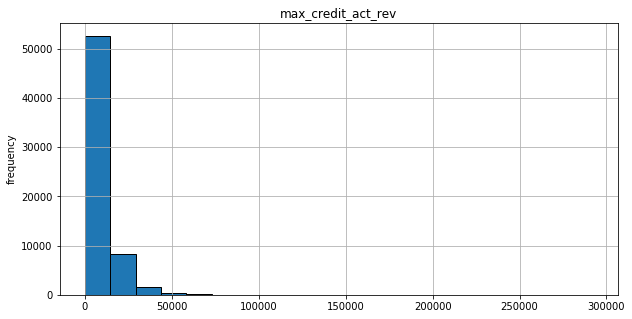

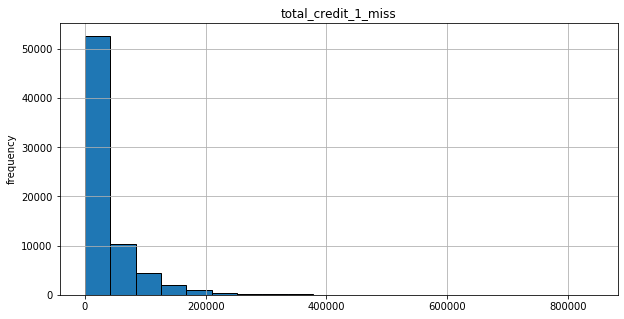

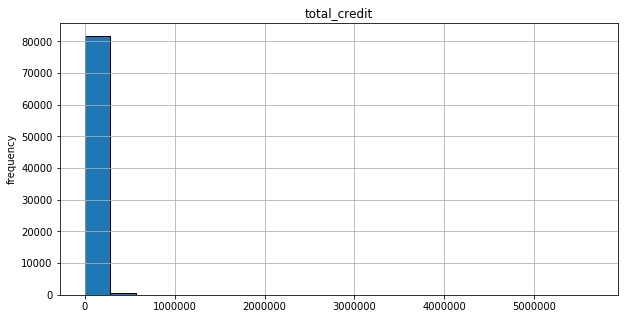

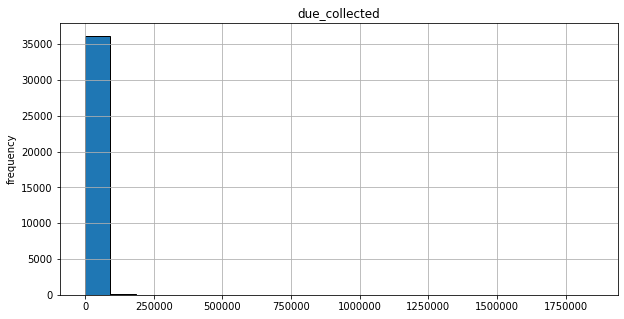

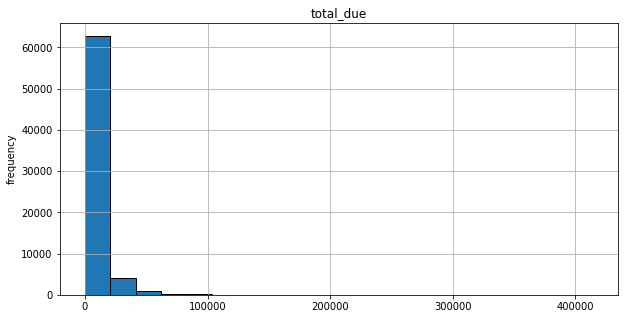

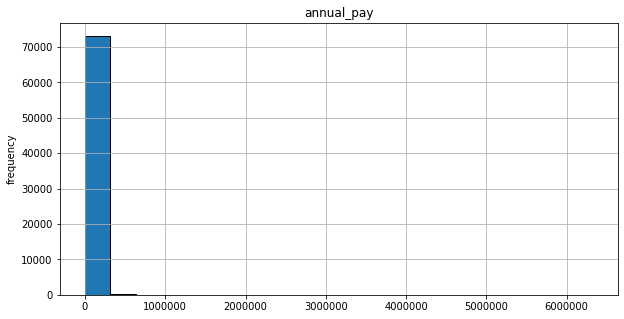

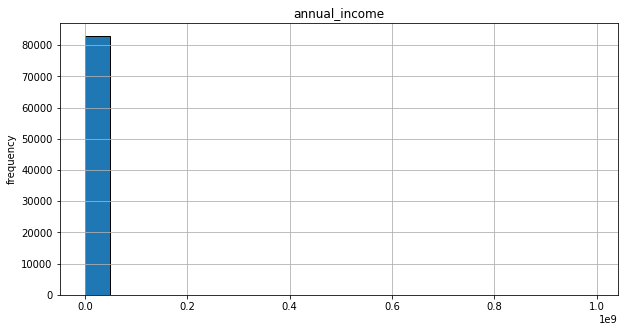

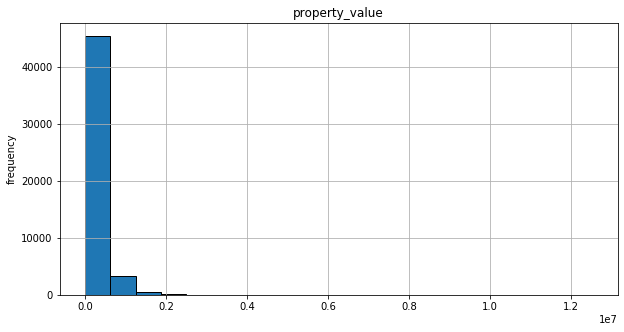

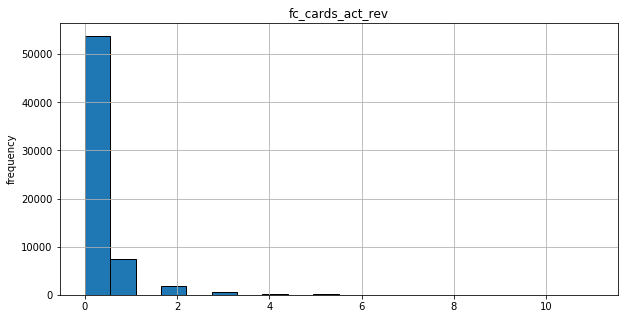

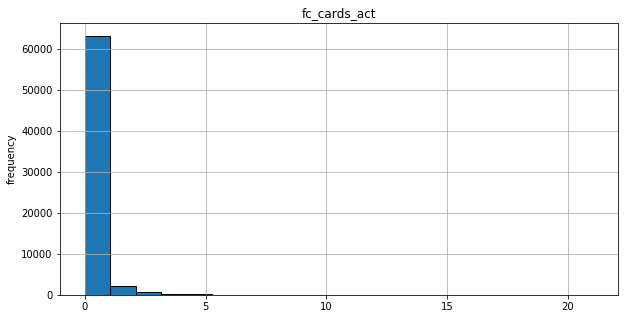

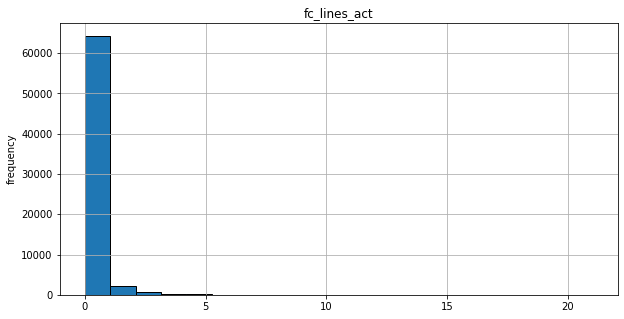

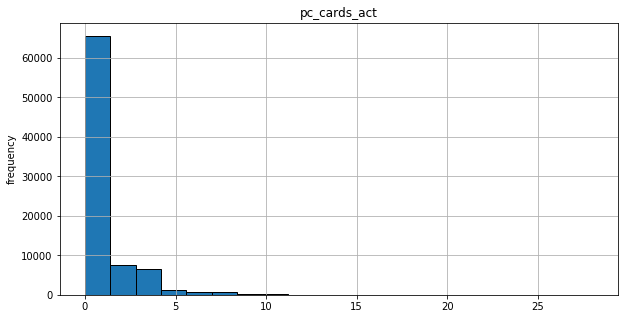

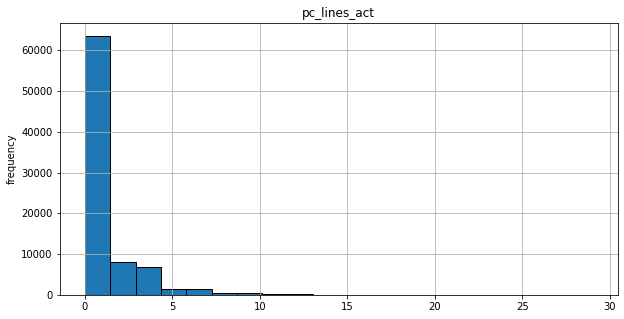

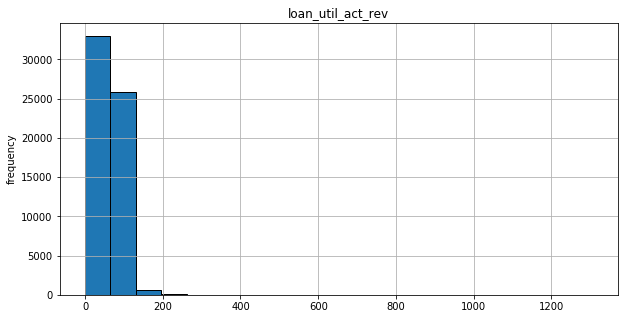

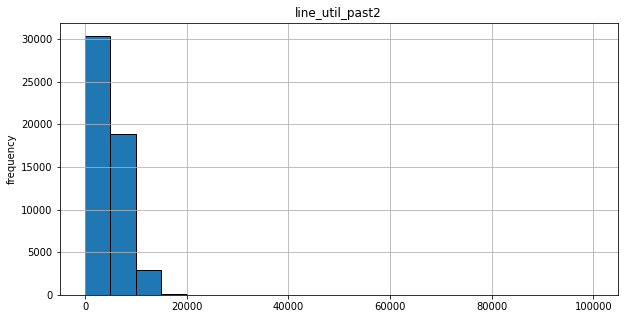

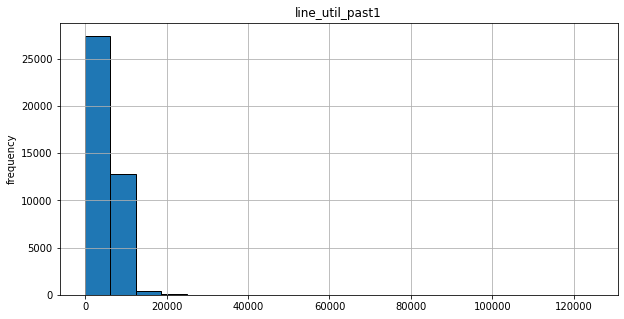

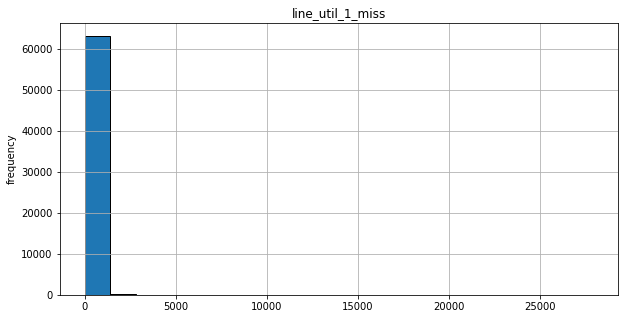

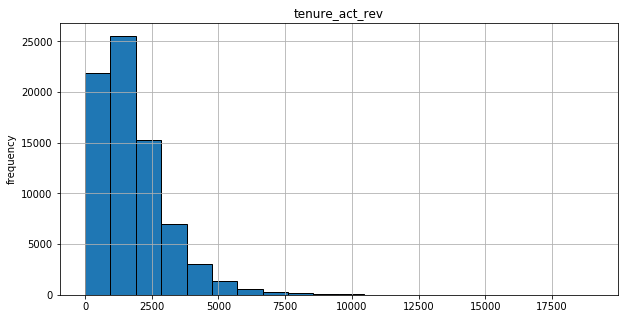

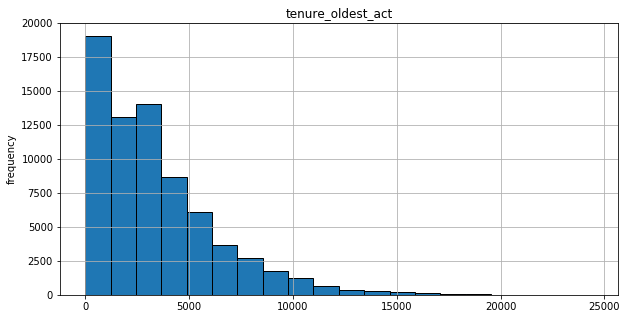

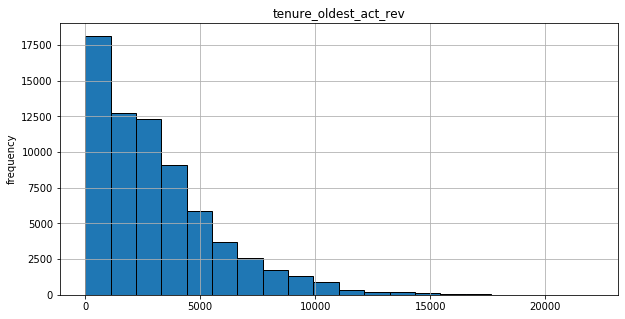

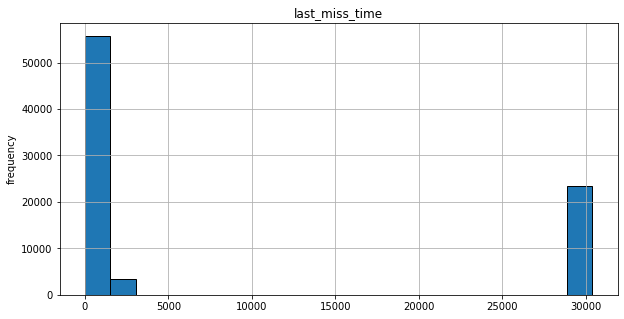

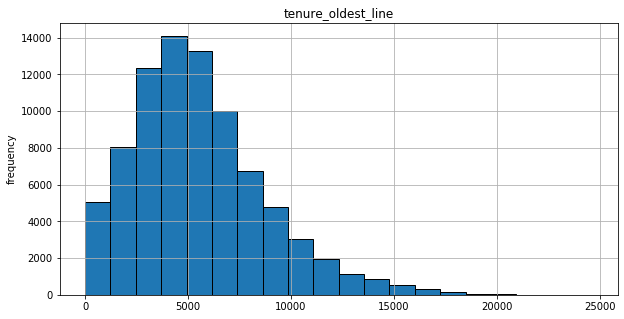

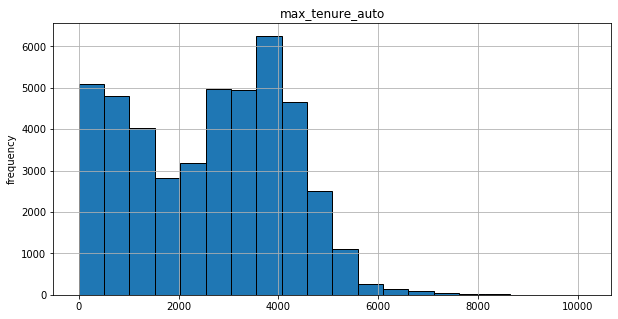

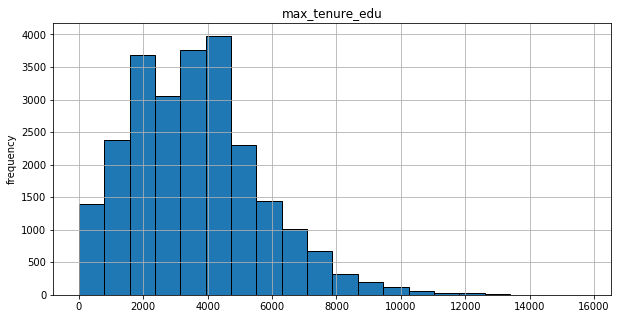

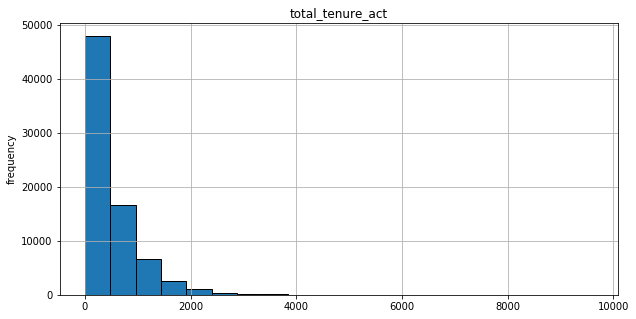

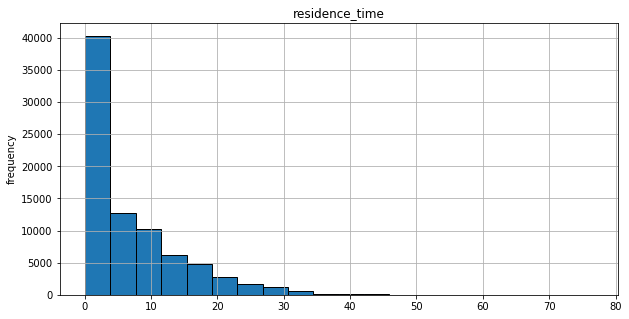

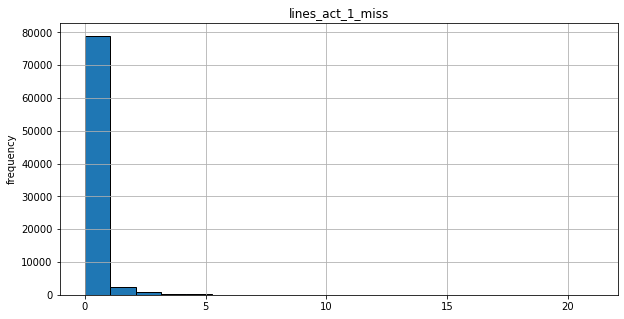

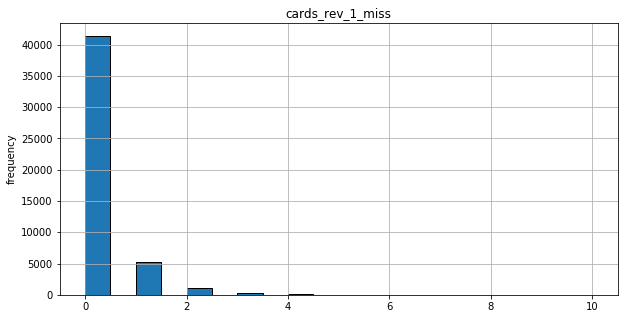

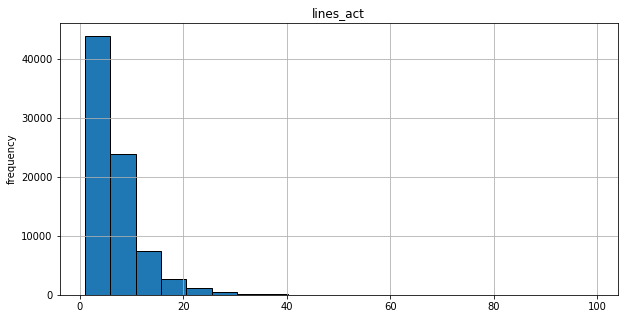

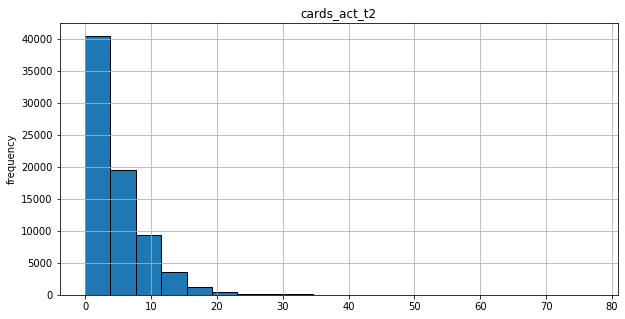

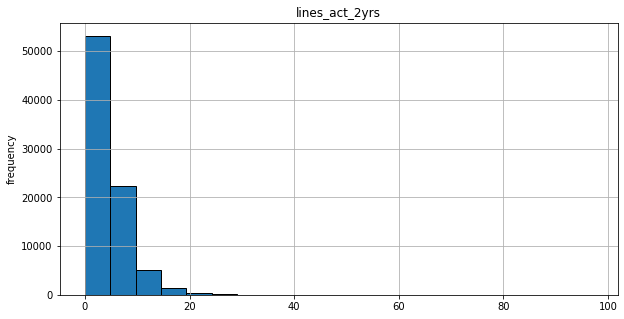

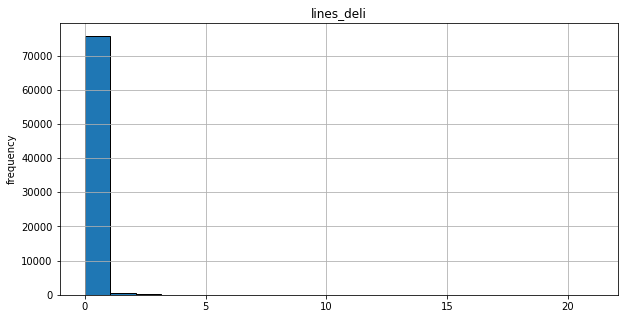

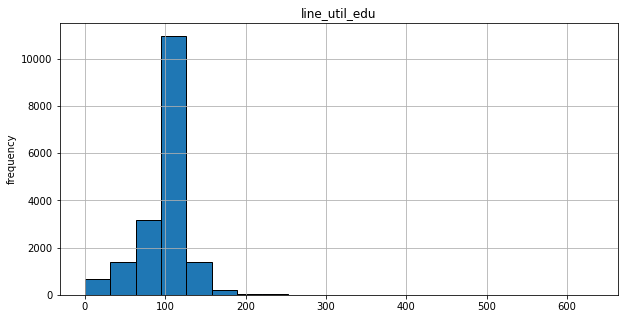

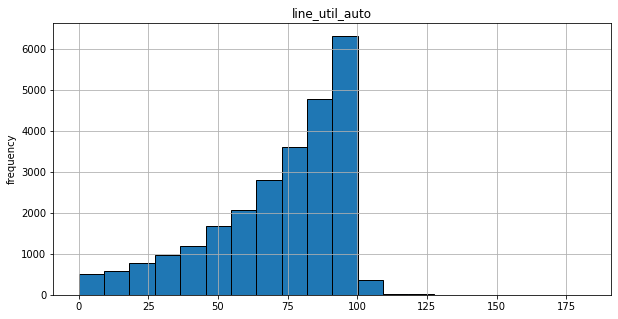

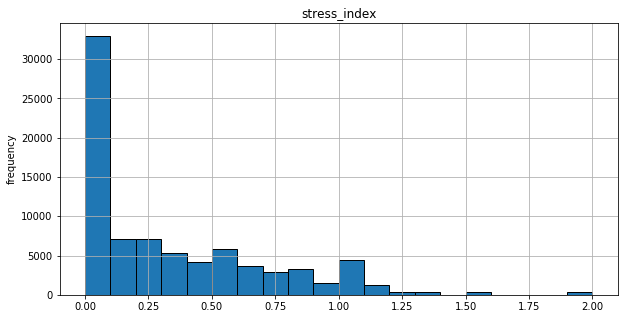

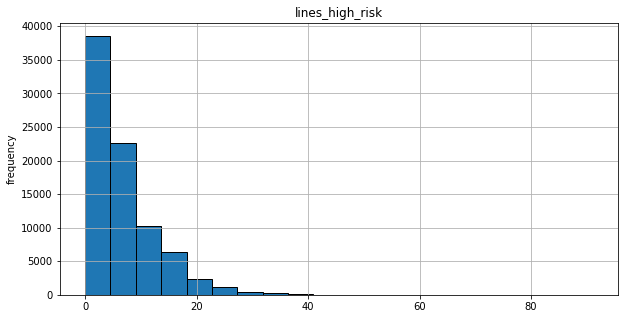

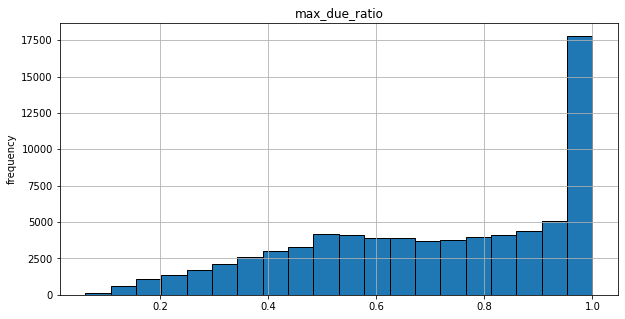

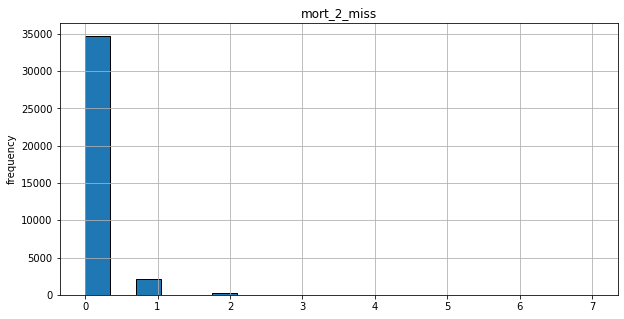

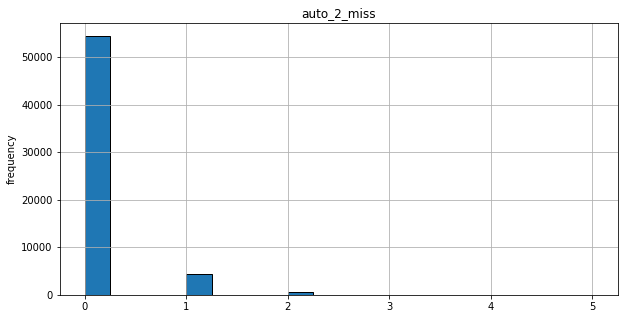

In [40]:
# Plotting distribution for each feature

for col in num_cols:
    
    plt.figure(figsize=(10,5))
    plt.hist(train[col], bins=20, edgecolor='black')
    plt.grid()
    plt.title(col)
    plt.ylabel('frequency')
    plt.show()